In [1]:
#import sys
#sys.path.insert(0, r'C:\Users\Kevin\Documents\Studium\Master_Thesis\GemPy_Models\gempy')
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
geo_model = gp.create_model('Hausham_Syncline_Bounding_Thrust_Topo')

In [3]:
gp.init_data(geo_model, [691763,724367,5281393,5302675.,-3000,2000.],[100,100,100],
            path_o = 'C:/Users/Kevin/Documents/Studium/Master_Thesis/GemPy_Models/data/True_Boundary_Sets/Hausham_Bounding_Thrust/orientations_Hausham_Bounding_Thrust_UTM.csv',
            path_i = 'C:/Users/Kevin/Documents/Studium/Master_Thesis/GemPy_Models/data/True_Boundary_Sets/Hausham_Bounding_Thrust/Points_Hausham_Bounding_Thrust_UTM.csv', default_values=True);

Active grids: ['regular']


In [4]:
gp.get_data(geo_model, 'surface_points').head()

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,687449.2316,5291012.847,804.311137,0.250100,0.455533,0.507776,Helvetics_Base_Thrust,Default series,1,1,1.000000e-08
1,688337.3707,5290984.398,786.800777,0.262014,0.455151,0.507542,Helvetics_Base_Thrust,Default series,1,1,1.000000e-08
2,689103.6981,5290683.127,740.511572,0.272294,0.451110,0.506921,Helvetics_Base_Thrust,Default series,1,1,1.000000e-08
4,690669.9654,5290750.477,734.722548,0.293304,0.452013,0.506843,Helvetics_Base_Thrust,Default series,1,1,1.000000e-08
11,695078.9393,5291464.652,683.047458,0.352447,0.461593,0.506150,Helvetics_Base_Thrust,Default series,1,1,1.000000e-08


In [5]:
gp.get_data(geo_model, 'orientations').head()

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
142,715771.8290,5292622.915,930.5,0.630028,0.477131,0.509469,0.111619,-0.633022,0.766044,40,170,1,Helvetics_Base_Thrust,Default series,1,1,0.01
173,699087.7077,5291054.506,810.1,0.406222,0.456092,0.507854,0.341812,-0.939120,-0.034899,88,340,-1,Helvetics_Base_Thrust,Default series,1,1,0.01
174,688766.9800,5290522.122,836.8,0.267777,0.448950,0.508212,-0.087103,-0.995588,0.034899,88,185,1,Helvetics_Base_Thrust,Default series,1,1,0.01
7,720518.0587,5297865.288,582.0,0.693695,0.547453,0.504794,-0.072255,-0.825883,0.559193,56,185,1,Leitzach_Thrust,Default series,2,1,0.01
10,721271.5459,5297780.924,553.1,0.703802,0.546322,0.504407,-0.150384,-0.852869,0.500000,60,190,1,Leitzach_Thrust,Default series,2,1,0.01


In [6]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,Helvetics_Base_Thrust,Default series,1,False,#015482,1
1,Leitzach_Thrust,Default series,2,False,#9f0052,2
2,Baustein Beds,Default series,3,False,#ffbe00,3
3,Lower Chattian Coal FM,Default series,4,False,#728f02,4
4,Lower Bunte Molasse,Default series,5,False,#443988,5
5,Muehlau_Thrust,Default series,6,False,#ff3f20,6
6,basement,Basement,1,True,#325916,7


In [7]:
gp.map_series_to_surfaces(geo_model,
                            {"Helvetics_Thrust":('Helvetics_Base_Thrust'),
                             "Muehlau_Thrust":('Muehlau_Thrust'),
                             "Leitzach_Thrust":('Leitzach_Thrust'),
                             "Molasse": ('Lower Bunte Molasse','Lower Chattian Coal FM','Baustein Beds','basement')},remove_unused_series=True);

# Topography

In [8]:
fp = r"C:/Users/Kevin/Documents/Studium/Master_Thesis/GemPy_Models/data/True_Boundary_Sets/testhallo.tif"

In [9]:
fp

'C:/Users/Kevin/Documents/Studium/Master_Thesis/GemPy_Models/data/True_Boundary_Sets/GausKrueSRTM.tif'

Cropped raster to geo_model.grid.extent.
[ 691763  724367 5281393 5302675] [269 412]
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 6.91926020e+05,  5.28149941e+06, -2.97500000e+03],
       [ 6.91926020e+05,  5.28149941e+06, -2.92500000e+03],
       [ 6.91926020e+05,  5.28149941e+06, -2.87500000e+03],
       ...,
       [ 7.24169160e+05,  5.30263544e+06,  4.78000000e+02],
       [ 7.24248296e+05,  5.30263544e+06,  4.76000000e+02],
       [ 7.24327432e+05,  5.30263544e+06,  4.76000000e+02]])

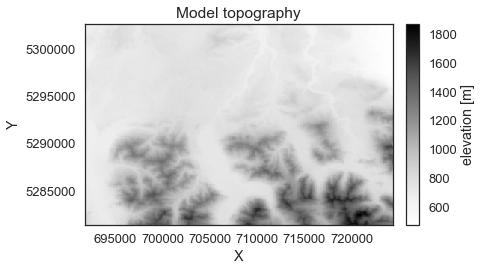

In [9]:
geo_model.set_topography(source='gdal',filepath=fp)

In [ ]:
%debug

In [ ]:
import gdal

# Thrusts

In [10]:
geo_model.set_is_fault(['Muehlau_Thrust','Leitzach_Thrust'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Helvetics_Thrust,False,False
Muehlau_Thrust,True,False
Leitzach_Thrust,True,False
Molasse,False,False


In [11]:
geo_model.series

,order_series,BottomRelation
Helvetics_Thrust,1,Erosion
Muehlau_Thrust,2,Fault
Leitzach_Thrust,3,Fault
Molasse,4,Erosion


# adjust fault system

In [12]:
geo_model.faults

,isFault,isFinite
Helvetics_Thrust,False,False
Muehlau_Thrust,True,False
Leitzach_Thrust,True,False
Molasse,False,False


In [13]:
geo_model.faults.faults_relations_df

,Helvetics_Thrust,Muehlau_Thrust,Leitzach_Thrust,Molasse
Helvetics_Thrust,False,False,False,False
Muehlau_Thrust,False,False,False,True
Leitzach_Thrust,False,False,False,True
Molasse,False,False,False,False


In [14]:
fr = np.zeros((4,4))
fr[0,3] = True
fr[1,2] = True
fr[1,3] = True
fr[2,3] = True
#fr[0,1] = True
#fr[0,2] = True

geo_model.faults.set_fault_relation((fr))

,Helvetics_Thrust,Muehlau_Thrust,Leitzach_Thrust,Molasse
Helvetics_Thrust,False,False,False,True
Muehlau_Thrust,False,False,True,True
Leitzach_Thrust,False,False,False,True
Molasse,False,False,False,False


# surface colors

In [15]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,Helvetics_Base_Thrust,Helvetics_Thrust,1,False,#015482,1
5,Muehlau_Thrust,Muehlau_Thrust,1,False,#527682,2
1,Leitzach_Thrust,Leitzach_Thrust,1,False,#527682,3
2,Baustein Beds,Molasse,1,False,#ffbe00,4
3,Lower Chattian Coal FM,Molasse,2,False,#728f02,5
4,Lower Bunte Molasse,Molasse,3,False,#443988,6
6,basement,Molasse,4,True,#325916,7


In [16]:
new_colors={'Baustein Beds':'#e8e402', 'Lower Chattian Coal FM':'#9e5f00','Lower Bunte Molasse':'#ff7700','basement':'#fdff70','Helvetics_Base_Thrust':'#24deff','Leitzach_Thrust':'#0081d6','Muehlau_Thrust':'#0015d6'}
geo_model.surfaces.colors.change_colors(new_colors)

,surface,series,order_surfaces,isBasement,color,id
0,Helvetics_Base_Thrust,Helvetics_Thrust,1,False,#24deff,1
5,Muehlau_Thrust,Muehlau_Thrust,1,False,#0015d6,2
1,Leitzach_Thrust,Leitzach_Thrust,1,False,#0081d6,3
2,Baustein Beds,Molasse,1,False,#e8e402,4
3,Lower Chattian Coal FM,Molasse,2,False,#9e5f00,5
4,Lower Bunte Molasse,Molasse,3,False,#ff7700,6
6,basement,Molasse,4,True,#fdff70,7


In [17]:
geo_model.surfaces.colors.change_colors()

Click to select new colors.


In [18]:
geo_model.grid

Grid Object. Values: 
array([[ 6.91926020e+05,  5.28149941e+06, -2.97500000e+03],
       [ 6.91926020e+05,  5.28149941e+06, -2.92500000e+03],
       [ 6.91926020e+05,  5.28149941e+06, -2.87500000e+03],
       ...,
       [ 7.24169160e+05,  5.30263544e+06,  4.78000000e+02],
       [ 7.24248296e+05,  5.30263544e+06,  4.76000000e+02],
       [ 7.24327432e+05,  5.30263544e+06,  4.76000000e+02]])

In [18]:
%matplotlib inline
gp.plot.plot_data_3D(geo_model)

In [35]:
#geo_model.grid.set_regular_grid([4470000,4500000.,5280000,5300000.,-3000,2000.],[100,100,100])

In [19]:
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_run',
                         verbose=[])

Compiling theano function...
Compilation Done!


In [20]:
gp.get_data(geo_model, 'kriging')

,values
range,39254.9
$C_o$,3.66892e+07
drift equations,"[3, 3, 3, 3]"
nugget grad,0.01
nugget scalar,1e-06


In [21]:
geo_model.additional_data.structure_data

,values
isLith,True
isFault,True
number faults,2
number surfaces,6
number series,4
number surfaces per series,"[1, 1, 1, 3]"
len surfaces surface_points,"[15, 5, 7, 21, 20, 20]"
len series surface_points,"[15, 5, 7, 61]"
len series orientations,"[3, 4, 4, 164]"


In [41]:
sol = gp.compute_model(geo_model, compute_mesh=False)

LinAlgError: Matrix is singular.
Apply node that caused the error: Solve{A_structure='general', lower=False, overwrite_A=False, overwrite_b=False}(Block Covariance Matrix, b vector)
Toposort index: 606
Inputs types: [TensorType(float64, matrix), TensorType(float64, vector)]
Inputs shapes: [(554, 554), (554,)]
Inputs strides: [(4432, 8), (8,)]
Inputs values: ['not shown', 'not shown']
Inputs type_num: [12, 12]
Outputs clients: [[Shape(Solve{A_structure='general', lower=False, overwrite_A=False, overwrite_b=False}.0), Reshape{1}(Solve{A_structure='general', lower=False, overwrite_A=False, overwrite_b=False}.0, MakeVector{dtype='int64'}.0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-6d618a42653d>", line 4, in <module>
    verbose=[])
  File "C:\Users\Kevin\Documents\Studium\Master_Thesis\GemPy_Models\gempy\gempy\core\gempy_api.py", line 162, in set_interpolation_data
    geo_model.interpolator.compile_th_fn(inplace=True, grid=grid)
  File "C:\Users\Kevin\Documents\Studium\Master_Thesis\GemPy_Models\gempy\gempy\core\interpolator.py", line 880, in compile_th_fn
    self.theano_graph.compute_series(),
  File "C:\Users\Kevin\Documents\Studium\Master_Thesis\GemPy_Models\gempy\gempy\core\theano\theano_graph_pro.py", line 378, in compute_series
    profile=False
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\theano\scan_module\scan.py", line 774, in scan
    condition, outputs, updates = scan_utils.get_updates_and_outputs(fn(*args))
  File "C:\Users\Kevin\Documents\Studium\Master_Thesis\GemPy_Models\gempy\gempy\core\theano\theano_graph_pro.py", line 1589, in compute_a_series
    self.solve_kriging(b),
  File "C:\Users\Kevin\Documents\Studium\Master_Thesis\GemPy_Models\gempy\gempy\core\theano\theano_graph_pro.py", line 940, in solve_kriging
    DK_parameters = theano.tensor.slinalg.solve(C_matrix, b)

Debugprint of the apply node: 
Solve{A_structure='general', lower=False, overwrite_A=False, overwrite_b=False} [id A] <TensorType(float64, vector)> ''   
 |IncSubtensor{Set;int64::, int64:int64:} [id B] <TensorType(float64, matrix)> 'Block Covariance Matrix'   
 |IncSubtensor{Set;int64:int64:} [id C] <TensorType(float64, vector)> 'b vector'   

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.
Apply node that caused the error: for{cpu,Looping}(Elemwise{minimum,no_inplace}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, Constant values to interpolate., Number of points per surface used to split rest-ref, fault relation matrix, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, Range, Covariance at 0, <TensorType(float64, scalar)>, Nugget effect of gradients, Nugget effect of scalar, Attenuation factor, Sigmoid Outside, Sigmoid slope, <TensorType(bool, vector)>, All the surface_points points at once, Position of the dips, Angle of every dip, Azimuth, Polarity, Values that the blocks are taking)
Toposort index: 131
Inputs types: [TensorType(int64, scalar), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(float64, 4D), TensorType(float64, matrix), TensorType(float64, 3D), TensorType(float64, 3D), TensorType(bool, 3D), TensorType(float32, matrix), TensorType(int32, vector), TensorType(int32, matrix), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(bool, vector), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, matrix)]
Inputs shapes: [(), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (5, 4, 1, 1000160), (5, 621), (5, 4, 1000160), (5, 4, 6), (5, 4, 1000160), (1000000, 3), (6,), (4, 4), (), (), (), (), (), (525,), (86,), (), (), (), (4,), (86, 3), (175, 3), (175,), (175,), (175,), (1, 7)]
Inputs strides: [(), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (1,), (1,), (1,), (4,), (4,), (4,), (4,), (32005120, 8001280, 8001280, 8), (4968, 8), (32005120, 8001280, 8), (192, 48, 8), (4000640, 1000160, 1), (12, 4), (4,), (16, 4), (), (), (), (), (), (8,), (8,), (), (), (), (1,), (8, 688), (8, 1400), (8,), (8,), (8,), (56, 8)]
Inputs values: [array(4, dtype=int64), array([ 0, 14, 20, 24]), array([14, 20, 24, 80]), array([ 0,  3,  7, 11]), array([  3,   7,  11, 175]), array([ 0, 26, 47, 67]), array([ 26,  47,  67, 621]), array([0, 1, 2, 3]), array([1, 2, 3, 6]), array([3, 3, 3, 3]), array([ True,  True,  True,  True]), array([ True,  True,  True,  True]), array([ True,  True,  True,  True]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 1, 2, 3]), 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', array(10.), array(2.), array(0.52460247), array(490.25311279), array(4.), 'not shown', 'not shown', array(2.), array(50.), array(50000.), array([ True,  True,  True, False]), 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown']
Inputs type_num: [9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 7, 7, 7, 7, 12, 12, 12, 12, 0, 11, 7, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 0, 12, 12, 12, 12, 12, 12]
Outputs clients: [[Subtensor{int64::}(for{cpu,Looping}.0, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.1, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.2, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.3, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.4, Constant{1})]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-6d618a42653d>", line 4, in <module>
    verbose=[])
  File "C:\Users\Kevin\Documents\Studium\Master_Thesis\GemPy_Models\gempy\gempy\core\gempy_api.py", line 162, in set_interpolation_data
    geo_model.interpolator.compile_th_fn(inplace=True, grid=grid)
  File "C:\Users\Kevin\Documents\Studium\Master_Thesis\GemPy_Models\gempy\gempy\core\interpolator.py", line 880, in compile_th_fn
    self.theano_graph.compute_series(),
  File "C:\Users\Kevin\Documents\Studium\Master_Thesis\GemPy_Models\gempy\gempy\core\theano\theano_graph_pro.py", line 378, in compute_series
    profile=False

Debugprint of the apply node: 
for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |Elemwise{minimum,no_inplace} [id C] <TensorType(int64, scalar)> ''   
 | | |Elemwise{minimum,no_inplace} [id D] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id E] <TensorType(int64, scalar)> ''   
 | | | | |Elemwise{minimum,no_inplace} [id F] <TensorType(int64, scalar)> ''   
 | | | | | |Elemwise{minimum,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | | | | | |Elemwise{minimum,no_inplace} [id H] <TensorType(int64, scalar)> ''   
 | | | | | | | |Elemwise{minimum,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | | | | | | | | |Elemwise{minimum,no_inplace} [id J] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |Elemwise{minimum,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |Elemwise{minimum,no_inplace} [id L] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id N] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id O] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id P] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | |Subtensor{int64} [id Q] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | |Shape [id R] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | | | | |Subtensor{int64:int64:} [id S] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | | | | | | | | | | | | | | | | |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | | | |Subtensor{int64} [id U] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |   |Shape [id V] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | |   | |Subtensor{int64::} [id W] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | | | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | | |Subtensor{int64} [id X] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |   |Shape [id Y] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id Z] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | |Subtensor{int64} [id BA] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |   |Shape [id BB] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | |   | |Subtensor{int64::} [id BC] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | |Subtensor{int64} [id BD] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |   |Shape [id BE] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id BF] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | |Subtensor{int64} [id BG] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |   |Shape [id BH] <TensorType(int64, vector)> ''   
 | | | | | | | | | | |   | |Subtensor{int64::} [id BI] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | |Subtensor{int64} [id BJ] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |   |Shape [id BK] <TensorType(int64, vector)> ''   
 | | | | | | | | | |   | |Subtensor{int64:int64:} [id BL] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | |Subtensor{int64} [id BM] <TensorType(int64, scalar)> ''   
 | | | | | | | | |   |Shape [id BN] <TensorType(int64, vector)> ''   
 | | | | | | | | |   | |Subtensor{int64::} [id BO] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | |Subtensor{int64} [id BP] <TensorType(int64, scalar)> ''   
 | | | | | | | |   |Shape [id BQ] <TensorType(int64, vector)> ''   
 | | | | | | | |   | |Subtensor{int64::} [id BR] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | |Subtensor{int64} [id BS] <TensorType(int64, scalar)> ''   
 | | | | | | |   |Shape [id BT] <TensorType(int64, vector)> ''   
 | | | | | | |   | |Subtensor{int64::} [id BU] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | |Subtensor{int64} [id BV] <TensorType(int64, scalar)> ''   
 | | | | | |   |Shape [id BW] <TensorType(int64, vector)> ''   
 | | | | | |   | |Subtensor{int64::} [id BX] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | | | | | |   |Constant{0} [id T] <int64>
 | | | | | |Subtensor{int64} [id BY] <TensorType(int64, scalar)> ''   
 | | | | |   |Shape [id BZ] <TensorType(int64, vector)> ''   
 | | | | |   | |Subtensor{int64::} [id CA] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | | | | |   |Constant{0} [id T] <int64>
 | | | | |Subtensor{int64} [id CB] <TensorType(int64, scalar)> ''   
 | | | |   |Shape [id CC] <TensorType(int64, vector)> ''   
 | | | |   | |Subtensor{int64::} [id CD] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | | | |   |Constant{0} [id T] <int64>
 | | | |Subtensor{int64} [id CE] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id CF] <TensorType(int64, vector)> ''   
 | | |   | |Subtensor{int64::} [id CG] <TensorType(int32, vector)> ''   
 | | |   |   |<TensorType(int32, vector)> [id CH] <TensorType(int32, vector)>
 | | |   |   |Constant{0} [id T] <int64>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id CI] <TensorType(int64, scalar)> ''   
 | |   |Shape [id CJ] <TensorType(int64, vector)> ''   
 | |   | |Subtensor{int64::} [id CK] <TensorType(int32, vector)> ''   
 | |   |   |<TensorType(int32, vector)> [id CL] <TensorType(int32, vector)>
 | |   |   |Constant{0} [id T] <int64>
 | |   |Constant{0} [id T] <int64>
 | |TensorConstant{5000} [id CM] <TensorType(int64, scalar)>
 |Subtensor{:int64:} [id CN] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id S] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id CP] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id W] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CQ] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id Z] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CR] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BC] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CS] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BF] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CT] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BI] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CU] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BL] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CV] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BO] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CW] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BR] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CX] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BU] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CY] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BX] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CZ] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id CA] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DA] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CD] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DB] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CG] <TensorType(int32, vector)> ''   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DC] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CK] <TensorType(int32, vector)> ''   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DD] <TensorType(int32, vector)> ''   
 | |TensorConstant{[   0    1..4998 4999]} [id DE] <TensorType(int32, vector)>
 | |ScalarFromTensor [id CO] <int64> ''   
 |IncSubtensor{Set;:int64:} [id DF] <TensorType(float64, 4D)> ''   
 | |AllocEmpty{dtype='float64'} [id DG] <TensorType(float64, 4D)> ''   
 | | |Elemwise{add,no_inplace} [id DH] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DI] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id DK] <TensorType(float64, 4D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1,2} [id DL] <TensorType(float64, (True, False, False, False))> ''   
 | | |   |     |block matrix [id DM] <TensorType(float64, 3D)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id DN] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id DP] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | | |Constant{2} [id DQ] <int64>
 | | |Subtensor{int64} [id DR] <TensorType(int64, scalar)> ''   
 | |   |Shape [id DJ] <TensorType(int64, vector)> ''   
 | |   |Constant{3} [id DS] <int64>
 | |Rebroadcast{0} [id DK] <TensorType(float64, 4D)> ''   
 | |ScalarFromTensor [id DT] <int64> ''   
 |   |Subtensor{int64} [id DI] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id DU] <TensorType(float64, matrix)> ''   
 | |AllocEmpty{dtype='float64'} [id DV] <TensorType(float64, matrix)> ''   
 | | |Elemwise{add,no_inplace} [id DW] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DX] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id DY] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id DZ] <TensorType(float64, matrix)> ''   
 | | |   |   |InplaceDimShuffle{x,0} [id EA] <TensorType(float64, row)> ''   
 | | |   |     |Weights vector [id EB] <TensorType(float64, vector)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id EC] <TensorType(int64, scalar)> ''   
 | |   |Shape [id DY] <TensorType(int64, vector)> ''   
 | |   |Constant{1} [id DO] <int64>
 | |Rebroadcast{0} [id DZ] <TensorType(float64, matrix)> ''   
 | |ScalarFromTensor [id ED] <int64> ''   
 |   |Subtensor{int64} [id DX] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EE] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id EF] <TensorType(float64, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id EG] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id EH] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id EI] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EJ] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EK] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Scalar matrix [id EL] <TensorType(float64, matrix)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id EM] <TensorType(int64, scalar)> ''   
 | | | |Shape [id EI] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id EN] <TensorType(int64, scalar)> ''   
 | |   |Shape [id EI] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id EJ] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id EO] <int64> ''   
 |   |Subtensor{int64} [id EH] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EP] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id EQ] <TensorType(float64, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id ER] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id ES] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id ET] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EU] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EV] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Alloc [id EW] <TensorType(float64, matrix)> ''   
 | | |   |       |TensorConstant{0.0} [id EX] <TensorType(float64, scalar)>
 | | |   |       |Subtensor{int64} [id EY] <TensorType(int64, scalar)> ''   
 | | |   |       | |Shape [id EZ] <TensorType(int64, vector)> ''   
 | | |   |       | | |<TensorType(int32, vector)> [id CH] <TensorType(int32, vector)>
 | | |   |       | |Constant{0} [id T] <int64>
 | | |   |       |Subtensor{int64} [id FA] <TensorType(int32, scalar)> ''   
 | | |   |         |List with the number of surfaces [id FB] <TensorType(int32, vector)>
 | | |   |         |Constant{-1} [id FC] <int64>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id FD] <TensorType(int64, scalar)> ''   
 | | | |Shape [id ET] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id FE] <TensorType(int64, scalar)> ''   
 | |   |Shape [id ET] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id EU] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id FF] <int64> ''   
 |   |Subtensor{int64} [id ES] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id FG] <TensorType(bool, 3D)> ''   
 | |AllocEmpty{dtype='bool'} [id FH] <TensorType(bool, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id FI] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id FJ] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id FK] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id FL] <TensorType(bool, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id FM] <TensorType(bool, (True, False, False))> ''   
 | | |   |     |mask matrix [id FN] <TensorType(bool, matrix)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id FO] <TensorType(int64, scalar)> ''   
 | | | |Shape [id FK] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id FP] <TensorType(int64, scalar)> ''   
 | |   |Shape [id FK] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id FL] <TensorType(bool, 3D)> ''   
 | |ScalarFromTensor [id FQ] <int64> ''   
 |   |Subtensor{int64} [id FJ] <TensorType(int64, scalar)> ''   
 |Constant values to interpolate. [id FR] <TensorType(float32, matrix)>
 |Number of points per surface used to split rest-ref [id FS] <TensorType(int32, vector)>
 |fault relation matrix [id FT] <TensorType(int32, matrix)>
 |<TensorType(float64, scalar)> [id FU] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id FV] <TensorType(float64, scalar)>
 |Range [id FW] <TensorType(float64, scalar)>
 |Covariance at 0 [id FX] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id FY] <TensorType(float64, scalar)>
 |Nugget effect of gradients [id FZ] <TensorType(float64, vector)>
 |Nugget effect of scalar [id GA] <TensorType(float64, vector)>
 |Attenuation factor [id GB] <TensorType(float64, scalar)>
 |Sigmoid Outside [id GC] <TensorType(float64, scalar)>
 |Sigmoid slope [id GD] <TensorType(float64, scalar)>
 |<TensorType(bool, vector)> [id GE] <TensorType(bool, vector)>
 |All the surface_points points at once [id GF] <TensorType(float64, matrix)>
 |Position of the dips [id GG] <TensorType(float64, matrix)>
 |Angle of every dip [id GH] <TensorType(float64, vector)>
 |Azimuth [id GI] <TensorType(float64, vector)>
 |Polarity [id GJ] <TensorType(float64, vector)>
 |Values that the blocks are taking [id GK] <TensorType(float64, matrix)>
for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   

Inner graphs of the scan ops:

for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 >IncSubtensor{Set;int32, ::} [id GL] <TensorType(float64, 3D)> ''   
 > |block matrix[t-1] [id GM] <TensorType(float64, 3D)> -> [id DF]
 > |if{} [id GN] <TensorType(float64, matrix)> ''   
 > | |Vector controlling if block matrix must be recomputed[t] [id GO] <TensorType(bool, scalar)> -> [id CZ]
 > | |if{} [id GP] <TensorType(float64, matrix)> ''   
 > | | |The series (fault) is finite[t] [id GQ] <TensorType(int32, scalar)> -> [id DA]
 > | | |Sum{axis=[0], acc_dtype=float64} [id GR] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | | |Sum{axis=[0], acc_dtype=float64} [id GS] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | |Subtensor{int32, ::} [id GT] <TensorType(float64, matrix)> ''   
 > |   |block matrix[t-1] [id GM] <TensorType(float64, 3D)> -> [id DF]
 > |   |ScalarFromTensor [id GU] <int32> ''   
 > |     |<TensorType(int32, scalar)> [id GV] <TensorType(int32, scalar)> -> [id DD]
 > |ScalarFromTensor [id GU] <int32> ''   
 >IncSubtensor{Set;int32:int32:} [id GW] <TensorType(float64, vector)> ''   
 > |Weights vector[t-1] [id GX] <TensorType(float64, vector)> -> [id DU]
 > |if{} [id GY] <TensorType(float64, vector)> ''   
 > | |Vector controlling if weights must be recomputed[t] [id GZ] <TensorType(bool, scalar)> -> [id CX]
 > | |Reshape{1} [id HA] <TensorType(float64, vector)> 'Dual Kriging parameters'   
 > | |Subtensor{int32:int32:} [id HB] <TensorType(float64, vector)> ''   
 > |   |Weights vector[t-1] [id GX] <TensorType(float64, vector)> -> [id DU]
 > |   |ScalarFromTensor [id HC] <int32> ''   
 > |   | |Length of weights in every series[t] [id HD] <TensorType(int32, scalar)> -> [id CS]
 > |   |ScalarFromTensor [id HE] <int32> ''   
 > |     |Length of weights in every series[t+1] [id HF] <TensorType(int32, scalar)> -> [id CT]
 > |ScalarFromTensor [id HC] <int32> ''   
 > |ScalarFromTensor [id HE] <int32> ''   
 >IncSubtensor{Set;int32} [id HG] <TensorType(float64, matrix)> ''   
 > |Scalar matrix[t-1] [id HH] <TensorType(float64, matrix)> -> [id EE]
 > |if{} [id HI] <TensorType(float64, vector)> ''   
 > | |Vector controlling if scalar matrix must be recomputed[t] [id HJ] <TensorType(bool, scalar)> -> [id CY]
 > | |Subtensor{int64} [id HK] <TensorType(float64, vector)> 'Value of the potential field at every point'   
 > | |Subtensor{int32} [id HL] <TensorType(float64, vector)> ''   
 > |   |Scalar matrix[t-1] [id HH] <TensorType(float64, matrix)> -> [id EE]
 > |   |ScalarFromTensor [id GU] <int32> ''   
 > |ScalarFromTensor [id GU] <int32> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HM] <TensorType(float64, matrix)> ''   
 > |<TensorType(float64, matrix)> [id HN] <TensorType(float64, matrix)> -> [id EP]
 > |AdvancedSubtensor1 [id HO] <TensorType(float64, vector)> ''   
 > | |Subtensor{int64:int64:} [id HP] <TensorType(float64, vector)> ''   
 > | | |if{} [id HI] <TensorType(float64, vector)> ''   
 > | | |ScalarFromTensor [id HQ] <int64> ''   
 > | | | |Elemwise{mul,no_inplace} [id HR] <TensorType(int64, scalar)> ''   
 > | | |   |TensorConstant{-2} [id HS] <TensorType(int8, scalar)>
 > | | |   |Elemwise{sub,no_inplace} [id HT] <TensorType(int64, scalar)> ''   
 > | | |     |Subtensor{int64} [id HU] <TensorType(int64, scalar)> ''   
 > | | |     | |Shape [id HV] <TensorType(int64, vector)> ''   
 > | | |     | | |All the surface_points points at once_copy [id HW] <TensorType(float64, matrix)> -> [id GF]
 > | | |     | |Constant{0} [id HX] <int64>
 > | | |     |Subtensor{int64} [id HY] <TensorType(int64, scalar)> ''   
 > | | |       |Shape [id HZ] <TensorType(int64, vector)> ''   
 > | | |       | |Number of points per surface used to split rest-ref_copy [id IA] <TensorType(int32, vector)> -> [id FS]
 > | | |       |Constant{0} [id HX] <int64>
 > | | |ScalarFromTensor [id IB] <int64> ''   
 > | |   |Elemwise{neg,no_inplace} [id IC] <TensorType(int64, scalar)> ''   
 > | |     |Elemwise{sub,no_inplace} [id HT] <TensorType(int64, scalar)> ''   
 > | |Subtensor{int32:int32:} [id ID] <TensorType(int32, vector)> ''   
 > |   |CumOp{None, add} [id IE] <TensorType(int32, vector)> 'Number of points per surfaces after rest-ref. This is used for finding the differentsurface points withing a layer.'   
 > |   |ScalarFromTensor [id IF] <int32> ''   
 > |   | |List with the number of surfaces[t] [id IG] <TensorType(int32, scalar)> -> [id CU]
 > |   |ScalarFromTensor [id IH] <int32> ''   
 > |     |List with the number of surfaces[t+1] [id II] <TensorType(int32, scalar)> -> [id CV]
 > |<TensorType(int32, scalar)> [id GV] <TensorType(int32, scalar)> -> [id DD]
 > |Elemwise{sub,no_inplace} [id IJ] <TensorType(int32, vector)> ''   
 >   |Subtensor{int32:int32:} [id IK] <TensorType(int32, vector)> ''   
 >   | |TensorConstant{[   1    2..4998 4999]} [id IL] <TensorType(int32, vector)>
 >   | |ScalarFromTensor [id IF] <int32> ''   
 >   | |ScalarFromTensor [id IH] <int32> ''   
 >   |TensorConstant{(1,) of 1} [id IM] <TensorType(int8, (True,))>
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   
 > |IncSubtensor{Set;int32, ::} [id IO] <TensorType(bool, matrix)> ''   
 > | |mask matrix[t-1] [id IP] <TensorType(bool, matrix)> -> [id FG]
 > | |if{} [id IQ] <TensorType(bool, vector)> ''   
 > | | |<TensorType(int32, scalar)> [id IR] <TensorType(int32, scalar)> -> [id DC]
 > | | |Elemwise{gt,no_inplace} [id IS] <TensorType(bool, vector)> ''   
 > | | | |if{} [id HI] <TensorType(float64, vector)> ''   
 > | | | |InplaceDimShuffle{x} [id IT] <TensorType(float64, (True,))> ''   
 > | | |   |MaxAndArgmax{axis=(0,)}.0 [id IU] <TensorType(float64, scalar)> 'max'   
 > | | |Subtensor{int32, ::} [id IV] <TensorType(bool, vector)> ''   
 > | |   |mask matrix[t-1] [id IP] <TensorType(bool, matrix)> -> [id FG]
 > | |   |ScalarFromTensor [id IW] <int32> ''   
 > | |     |Elemwise{sub,no_inplace} [id IX] <TensorType(int32, scalar)> ''   
 > | |       |<TensorType(int32, scalar)> [id GV] <TensorType(int32, scalar)> -> [id DD]
 > | |       |TensorConstant{1} [id IY] <TensorType(int8, scalar)>
 > | |ScalarFromTensor [id IW] <int32> ''   
 > |if{} [id IZ] <TensorType(bool, vector)> ''   
 > | |<TensorType(int32, scalar)> [id JA] <TensorType(int32, scalar)> -> [id DB]
 > | |Elemwise{gt,no_inplace} [id JB] <TensorType(bool, vector)> ''   
 > | | |if{} [id HI] <TensorType(float64, vector)> ''   
 > | | |InplaceDimShuffle{x} [id JC] <TensorType(float64, (True,))> ''   
 > | |   |Elemwise{neg,no_inplace} [id JD] <TensorType(float64, scalar)> ''   
 > | |     |MaxAndArgmax{axis=(0,)}.0 [id JE] <TensorType(float64, scalar)> 'max'   
 > | |Elemwise{mul,no_inplace} [id JF] <TensorType(bool, vector)> ''   
 > |   |InplaceDimShuffle{x} [id JG] <TensorType(bool, (True,))> ''   
 > |   | |Elemwise{invert,no_inplace} [id JH] <TensorType(bool, scalar)> ''   
 > |   |   |Subtensor{int32} [id JI] <TensorType(bool, scalar)> ''   
 > |   |     |<TensorType(bool, vector)> [id JJ] <TensorType(bool, vector)> -> [id GE]
 > |   |     |ScalarFromTensor [id GU] <int32> ''   
 > |   |Elemwise{second,no_inplace} [id JK] <TensorType(bool, vector)> ''   
 > |     |if{} [id HI] <TensorType(float64, vector)> ''   
 > |     |TensorConstant{(1,) of True} [id JL] <TensorType(bool, (True,))>
 > |ScalarFromTensor [id GU] <int32> ''   

for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id GL] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GW] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HG] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HM] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GL] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GW] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HG] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HM] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GL] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GW] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HG] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HM] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GL] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GW] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HG] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HM] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   

Storage map footprint:
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 4, 1000160), ElemSize: 8 Byte(s), TotalSize: 160025600 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 4, 1, 1000160), ElemSize: 8 Byte(s), TotalSize: 160025600 Byte(s)
 - for{cpu,Looping}.0, Shape: (5, 4, 1, 1000160), ElemSize: 8 Byte(s), TotalSize: 160025600 Byte(s)
 - for{cpu,Looping}.2, Shape: (5, 4, 1000160), ElemSize: 8 Byte(s), TotalSize: 160025600 Byte(s)
 - block matrix, Shared Input, Shape: (4, 1, 1000160), ElemSize: 8 Byte(s), TotalSize: 32005120 Byte(s)
 - Scalar matrix, Shared Input, Shape: (4, 1000160), ElemSize: 8 Byte(s), TotalSize: 32005120 Byte(s)
 - Coordinates of the grid points to interpolate, Input, Shape: (1000000, 3), ElemSize: 8 Byte(s), TotalSize: 24000000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 4, 1000160), ElemSize: 1 Byte(s), TotalSize: 20003200 Byte(s)
 - for{cpu,Looping}.4, Shape: (5, 4, 1000160), ElemSize: 1 Byte(s), TotalSize: 20003200 Byte(s)
 - Constant values to interpolate., Shared Input, Shape: (1000000, 3), ElemSize: 4 Byte(s), TotalSize: 12000000 Byte(s)
 - mask matrix, Shared Input, Shape: (4, 1000160), ElemSize: 1 Byte(s), TotalSize: 4000640 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 621), ElemSize: 8 Byte(s), TotalSize: 24840 Byte(s)
 - for{cpu,Looping}.1, Shape: (5, 621), ElemSize: 8 Byte(s), TotalSize: 24840 Byte(s)
 - TensorConstant{[   0    1..4998 4999]}, Shape: (5000,), ElemSize: 4 Byte(s), TotalSize: 20000 Byte(s)
 - Weights vector, Shared Input, Shape: (621,), ElemSize: 8 Byte(s), TotalSize: 4968 Byte(s)
 - Position of the dips, Input, Shape: (175, 3), ElemSize: 8 Byte(s), TotalSize: 4200 Byte(s)
 - Nugget effect of gradients, Shared Input, Shape: (525,), ElemSize: 8 Byte(s), TotalSize: 4200 Byte(s)
 - All the surface_points points at once, Input, Shape: (86, 3), ElemSize: 8 Byte(s), TotalSize: 2064 Byte(s)
 - Angle of every dip, Input, Shape: (175,), ElemSize: 8 Byte(s), TotalSize: 1400 Byte(s)
 - Azimuth, Input, Shape: (175,), ElemSize: 8 Byte(s), TotalSize: 1400 Byte(s)
 - Polarity, Input, Shape: (175,), ElemSize: 8 Byte(s), TotalSize: 1400 Byte(s)
 - Vector controlling if weights must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if scalar matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if block matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 4, 6), ElemSize: 8 Byte(s), TotalSize: 960 Byte(s)
 - for{cpu,Looping}.3, Shape: (5, 4, 6), ElemSize: 8 Byte(s), TotalSize: 960 Byte(s)
 - Nugget effect of scalar, Shared Input, Shape: (86,), ElemSize: 8 Byte(s), TotalSize: 688 Byte(s)
 - fault relation matrix, Shared Input, Shape: (4, 4), ElemSize: 4 Byte(s), TotalSize: 64 Byte(s)
 - Values that the blocks are taking, Input, Shape: (1, 7), ElemSize: 8 Byte(s), TotalSize: 56 Byte(s)
 - Number of points per surface used to split rest-ref, Shared Input, Shape: (6,), ElemSize: 4 Byte(s), TotalSize: 24 Byte(s)
 - Length of surface_points in every series, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - Length of foliations in every series, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - Length of weights in every series, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - List with the number of surfaces, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - Grade of the universal drift, Shared Input, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - The series (fault) is finite, Shared Input, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - <TensorType(int32, vector)>, Shared Input, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - <TensorType(int32, vector)>, Shared Input, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Range, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Covariance at 0, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Attenuation factor, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Sigmoid Outside, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Sigmoid slope, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{5000}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{3}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(bool, vector)>, Shared Input, Shape: (4,), ElemSize: 1 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 1 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 1 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 1 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1,) of -1}, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Full block matrix for faults or drift. We take 2 times len points for the faultdrift., Input, Shape: (0, 1000160), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 TotalSize: 784215229.0 Byte(s) 0.730 GB
 TotalSize inputs: 104054617.0 Byte(s) 0.097 GB



In [31]:
import skimage
skimage.__path__

['C:\\Users\\Kevin\\Anaconda3\\lib\\site-packages\\skimage']

In [22]:
gp.compute_model(geo_model)

C:\Users\Kevin\Anaconda3\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=4.17086e-30): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e))



Lithology ids 
  [1. 1. 1. ... 7. 7. 7.] 

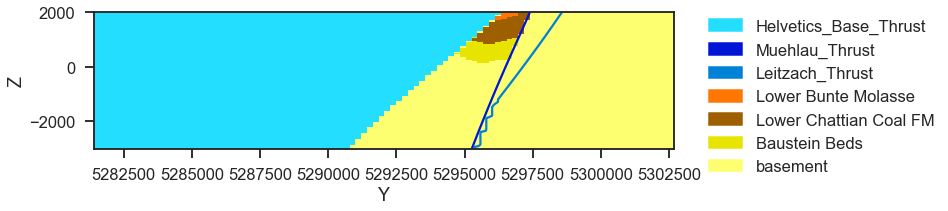

In [37]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=99, show_legend=True,
                    direction='x', show_data=False)

In [23]:
ver, sim = gp.get_surfaces(geo_model)

In [24]:
gp.plot.plot_3D(geo_model)

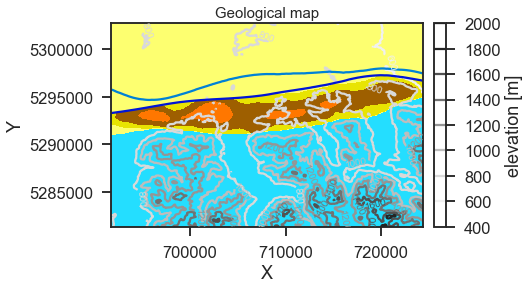

In [27]:
gp.plot.plot_map(geo_model, contour_lines=True, show_data=False)

In [ ]:
gp.save_model(geo_model, path='C:/Users/Kevin/Documents/Studium/Master_Thesis/GemPy_Models')

In [28]:
vtkp = gp.plot.plot_3D(geo_model)

In [29]:
vtkp.set_real_time_on()

In [30]:
vtkp.update_model()

LinAlgError: Matrix is singular.
Apply node that caused the error: Solve{A_structure='general', lower=False, overwrite_A=False, overwrite_b=False}(Block Covariance Matrix, InplaceDimShuffle{1,0}.0)
Toposort index: 614
Inputs types: [TensorType(float64, matrix), TensorType(float64, col)]
Inputs shapes: [(556, 556), (556, 1)]
Inputs strides: [(4448, 8), (8, 8)]
Inputs values: ['not shown', 'not shown']
Inputs type_num: [12, 12]
Outputs clients: [[Shape(Solve{A_structure='general', lower=False, overwrite_A=False, overwrite_b=False}.0), Reshape{1}(Solve{A_structure='general', lower=False, overwrite_A=False, overwrite_b=False}.0, MakeVector{dtype='int64'}.0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "<ipython-input-20-6d618a42653d>", line 4, in <module>
    verbose=[])
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\gempy_api.py", line 166, in set_interpolation_data
    geo_model.interpolator.compile_th_fn(inplace=True)
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\interpolator.py", line 866, in compile_th_fn
    self.theano_graph.compute_series(),
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\theano\theano_graph_pro.py", line 276, in compute_series
    profile=False
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\theano\scan_module\scan.py", line 774, in scan
    condition, outputs, updates = scan_utils.get_updates_and_outputs(fn(*args))
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\theano\theano_graph_pro.py", line 1408, in compute_a_series
    self.compute_weights(),
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\theano\theano_graph_pro.py", line 226, in compute_weights
    return self.solve_kriging()
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\theano\theano_graph_pro.py", line 815, in solve_kriging
    DK_parameters = theano.tensor.slinalg.solve(C_matrix, b2)

Debugprint of the apply node: 
Solve{A_structure='general', lower=False, overwrite_A=False, overwrite_b=False} [id A] <TensorType(float64, col)> ''   
 |IncSubtensor{Set;int64::, int64:int64:} [id B] <TensorType(float64, matrix)> 'Block Covariance Matrix'   
 |InplaceDimShuffle{1,0} [id C] <TensorType(float64, col)> ''   
   |Reshape{2} [id D] <TensorType(float64, row)> ''   
     |InplaceDimShuffle{0,2,1,3} [id E] <TensorType(float64, (True, True, True, False))> ''   
     | |Alloc [id F] <TensorType(float64, (True, True, True, False))> ''   
     |   |IncSubtensor{Set;int64:int64:} [id G] <TensorType(float64, vector)> 'b vector'   
     |   |TensorConstant{1} [id H] <TensorType(int8, scalar)>
     |   |TensorConstant{1} [id H] <TensorType(int8, scalar)>
     |   |TensorConstant{1} [id H] <TensorType(int8, scalar)>
     |   |Subtensor{int64} [id I] <TensorType(int64, scalar)> ''   
     |     |Shape [id J] <TensorType(int64, vector)> ''   
     |     | |IncSubtensor{Set;int64:int64:} [id G] <TensorType(float64, vector)> 'b vector'   
     |     |Constant{0} [id K] <int64>
     |MakeVector{dtype='int64'} [id L] <TensorType(int64, vector)> ''   
       |TensorConstant{1} [id M] <TensorType(int64, scalar)>
       |Elemwise{mul,no_inplace} [id N] <TensorType(int64, scalar)> ''   
         |Subtensor{int64} [id I] <TensorType(int64, scalar)> ''   
         |TensorConstant{1} [id H] <TensorType(int8, scalar)>

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.
Apply node that caused the error: for{cpu,Looping}(Elemwise{minimum,no_inplace}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, Number of points per surface used to split rest-ref, fault relation matrix, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, Range, Covariance at 0, <TensorType(float64, scalar)>, Nugget effect of gradients, Nugget effect of scalar, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(bool, vector)>, Coordinates of the grid points to interpolate, All the surface_points points at once, Position of the dips, Angle of every dip, Azimuth, Polarity, Values that the blocks are taking)
Toposort index: 131
Inputs types: [TensorType(int64, scalar), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(float64, 4D), TensorType(float64, matrix), TensorType(float64, 3D), TensorType(float64, 3D), TensorType(bool, 3D), TensorType(int32, vector), TensorType(int32, matrix), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(bool, vector), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, matrix)]
Inputs shapes: [(), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (5, 4, 1, 1110992), (5, 623), (5, 4, 1110992), (5, 4, 6), (5, 4, 1110992), (6,), (4, 4), (), (), (), (), (), (525,), (88,), (), (), (4,), (1110828, 3), (88, 3), (175, 3), (175,), (175,), (175,), (1, 7)]
Inputs strides: [(), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (1,), (1,), (1,), (4,), (4,), (4,), (4,), (35551744, 8887936, 8887936, 8), (4984, 8), (35551744, 8887936, 8), (192, 48, 8), (4443968, 1110992, 1), (4,), (16, 4), (), (), (), (), (), (8,), (8,), (), (), (1,), (24, 8), (8, 704), (8, 1400), (8,), (8,), (8,), (56, 8)]
Inputs values: [array(4, dtype=int64), array([ 0, 14, 18, 24]), array([14, 18, 24, 82]), array([ 0,  3,  7, 11]), array([  3,   7,  11, 175]), array([ 0, 26, 45, 67]), array([ 26,  45,  67, 623]), array([0, 1, 2, 3]), array([1, 2, 3, 6]), array([3, 3, 3, 3]), array([ True,  True,  True,  True]), array([ True,  True,  True,  True]), array([ True,  True,  True,  True]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 1, 2, 3]), 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', array(10.), array(2.), array(0.52657632), array(492.15909046), array(4.), 'not shown', 'not shown', array(2.), array(50.), array([ True,  True,  True, False]), 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown']
Inputs type_num: [9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 7, 7, 7, 7, 12, 12, 12, 12, 0, 7, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 0, 12, 12, 12, 12, 12, 12, 12]
Outputs clients: [[Subtensor{int64::}(for{cpu,Looping}.0, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.1, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.2, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.3, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.4, Constant{1})]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-6d618a42653d>", line 4, in <module>
    verbose=[])
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\gempy_api.py", line 166, in set_interpolation_data
    geo_model.interpolator.compile_th_fn(inplace=True)
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\interpolator.py", line 866, in compile_th_fn
    self.theano_graph.compute_series(),
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\theano\theano_graph_pro.py", line 276, in compute_series
    profile=False

Debugprint of the apply node: 
for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |Elemwise{minimum,no_inplace} [id C] <TensorType(int64, scalar)> ''   
 | | |Elemwise{minimum,no_inplace} [id D] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id E] <TensorType(int64, scalar)> ''   
 | | | | |Elemwise{minimum,no_inplace} [id F] <TensorType(int64, scalar)> ''   
 | | | | | |Elemwise{minimum,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | | | | | |Elemwise{minimum,no_inplace} [id H] <TensorType(int64, scalar)> ''   
 | | | | | | | |Elemwise{minimum,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | | | | | | | | |Elemwise{minimum,no_inplace} [id J] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |Elemwise{minimum,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |Elemwise{minimum,no_inplace} [id L] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id N] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id O] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id P] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | |Subtensor{int64} [id Q] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | |Shape [id R] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | | | | |Subtensor{int64:int64:} [id S] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | | | | | | | | | | | | | | | | |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | | | |Subtensor{int64} [id U] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |   |Shape [id V] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | |   | |Subtensor{int64::} [id W] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | | | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | | |Subtensor{int64} [id X] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |   |Shape [id Y] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id Z] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | |Subtensor{int64} [id BA] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |   |Shape [id BB] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | |   | |Subtensor{int64::} [id BC] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | |Subtensor{int64} [id BD] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |   |Shape [id BE] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id BF] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | |Subtensor{int64} [id BG] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |   |Shape [id BH] <TensorType(int64, vector)> ''   
 | | | | | | | | | | |   | |Subtensor{int64::} [id BI] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | |Subtensor{int64} [id BJ] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |   |Shape [id BK] <TensorType(int64, vector)> ''   
 | | | | | | | | | |   | |Subtensor{int64:int64:} [id BL] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | |Subtensor{int64} [id BM] <TensorType(int64, scalar)> ''   
 | | | | | | | | |   |Shape [id BN] <TensorType(int64, vector)> ''   
 | | | | | | | | |   | |Subtensor{int64::} [id BO] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | |Subtensor{int64} [id BP] <TensorType(int64, scalar)> ''   
 | | | | | | | |   |Shape [id BQ] <TensorType(int64, vector)> ''   
 | | | | | | | |   | |Subtensor{int64::} [id BR] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | |Subtensor{int64} [id BS] <TensorType(int64, scalar)> ''   
 | | | | | | |   |Shape [id BT] <TensorType(int64, vector)> ''   
 | | | | | | |   | |Subtensor{int64::} [id BU] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | |Subtensor{int64} [id BV] <TensorType(int64, scalar)> ''   
 | | | | | |   |Shape [id BW] <TensorType(int64, vector)> ''   
 | | | | | |   | |Subtensor{int64::} [id BX] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | | | | | |   |Constant{0} [id T] <int64>
 | | | | | |Subtensor{int64} [id BY] <TensorType(int64, scalar)> ''   
 | | | | |   |Shape [id BZ] <TensorType(int64, vector)> ''   
 | | | | |   | |Subtensor{int64::} [id CA] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | | | | |   |Constant{0} [id T] <int64>
 | | | | |Subtensor{int64} [id CB] <TensorType(int64, scalar)> ''   
 | | | |   |Shape [id CC] <TensorType(int64, vector)> ''   
 | | | |   | |Subtensor{int64::} [id CD] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | | | |   |Constant{0} [id T] <int64>
 | | | |Subtensor{int64} [id CE] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id CF] <TensorType(int64, vector)> ''   
 | | |   | |Subtensor{int64::} [id CG] <TensorType(int32, vector)> ''   
 | | |   |   |<TensorType(int32, vector)> [id CH] <TensorType(int32, vector)>
 | | |   |   |Constant{0} [id T] <int64>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id CI] <TensorType(int64, scalar)> ''   
 | |   |Shape [id CJ] <TensorType(int64, vector)> ''   
 | |   | |Subtensor{int64::} [id CK] <TensorType(int32, vector)> ''   
 | |   |   |<TensorType(int32, vector)> [id CL] <TensorType(int32, vector)>
 | |   |   |Constant{0} [id T] <int64>
 | |   |Constant{0} [id T] <int64>
 | |TensorConstant{5000} [id CM] <TensorType(int64, scalar)>
 |Subtensor{:int64:} [id CN] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id S] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id CP] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id W] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CQ] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id Z] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CR] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BC] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CS] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BF] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CT] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BI] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CU] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BL] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CV] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BO] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CW] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BR] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CX] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BU] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CY] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BX] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CZ] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id CA] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DA] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CD] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DB] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CG] <TensorType(int32, vector)> ''   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DC] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CK] <TensorType(int32, vector)> ''   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DD] <TensorType(int32, vector)> ''   
 | |TensorConstant{[   0    1..4998 4999]} [id DE] <TensorType(int32, vector)>
 | |ScalarFromTensor [id CO] <int64> ''   
 |IncSubtensor{Set;:int64:} [id DF] <TensorType(float64, 4D)> ''   
 | |AllocEmpty{dtype='float64'} [id DG] <TensorType(float64, 4D)> ''   
 | | |Elemwise{add,no_inplace} [id DH] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DI] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id DK] <TensorType(float64, 4D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1,2} [id DL] <TensorType(float64, (True, False, False, False))> ''   
 | | |   |     |block matrix [id DM] <TensorType(float64, 3D)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id DN] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id DP] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | | |Constant{2} [id DQ] <int64>
 | | |Subtensor{int64} [id DR] <TensorType(int64, scalar)> ''   
 | |   |Shape [id DJ] <TensorType(int64, vector)> ''   
 | |   |Constant{3} [id DS] <int64>
 | |Rebroadcast{0} [id DK] <TensorType(float64, 4D)> ''   
 | |ScalarFromTensor [id DT] <int64> ''   
 |   |Subtensor{int64} [id DI] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id DU] <TensorType(float64, matrix)> ''   
 | |AllocEmpty{dtype='float64'} [id DV] <TensorType(float64, matrix)> ''   
 | | |Elemwise{add,no_inplace} [id DW] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DX] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id DY] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id DZ] <TensorType(float64, matrix)> ''   
 | | |   |   |InplaceDimShuffle{x,0} [id EA] <TensorType(float64, row)> ''   
 | | |   |     |Weights vector [id EB] <TensorType(float64, vector)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id EC] <TensorType(int64, scalar)> ''   
 | |   |Shape [id DY] <TensorType(int64, vector)> ''   
 | |   |Constant{1} [id DO] <int64>
 | |Rebroadcast{0} [id DZ] <TensorType(float64, matrix)> ''   
 | |ScalarFromTensor [id ED] <int64> ''   
 |   |Subtensor{int64} [id DX] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EE] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id EF] <TensorType(float64, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id EG] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id EH] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id EI] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EJ] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EK] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Scalar matrix [id EL] <TensorType(float64, matrix)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id EM] <TensorType(int64, scalar)> ''   
 | | | |Shape [id EI] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id EN] <TensorType(int64, scalar)> ''   
 | |   |Shape [id EI] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id EJ] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id EO] <int64> ''   
 |   |Subtensor{int64} [id EH] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EP] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id EQ] <TensorType(float64, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id ER] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id ES] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id ET] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EU] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EV] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Alloc [id EW] <TensorType(float64, matrix)> ''   
 | | |   |       |TensorConstant{0.0} [id EX] <TensorType(float64, scalar)>
 | | |   |       |Subtensor{int64} [id EY] <TensorType(int64, scalar)> ''   
 | | |   |       | |Shape [id EZ] <TensorType(int64, vector)> ''   
 | | |   |       | | |<TensorType(int32, vector)> [id CH] <TensorType(int32, vector)>
 | | |   |       | |Constant{0} [id T] <int64>
 | | |   |       |Subtensor{int64} [id FA] <TensorType(int32, scalar)> ''   
 | | |   |         |List with the number of surfaces [id FB] <TensorType(int32, vector)>
 | | |   |         |Constant{-1} [id FC] <int64>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id FD] <TensorType(int64, scalar)> ''   
 | | | |Shape [id ET] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id FE] <TensorType(int64, scalar)> ''   
 | |   |Shape [id ET] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id EU] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id FF] <int64> ''   
 |   |Subtensor{int64} [id ES] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id FG] <TensorType(bool, 3D)> ''   
 | |AllocEmpty{dtype='bool'} [id FH] <TensorType(bool, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id FI] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id FJ] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id FK] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id FL] <TensorType(bool, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id FM] <TensorType(bool, (True, False, False))> ''   
 | | |   |     |mask matrix [id FN] <TensorType(bool, matrix)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id FO] <TensorType(int64, scalar)> ''   
 | | | |Shape [id FK] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id FP] <TensorType(int64, scalar)> ''   
 | |   |Shape [id FK] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id FL] <TensorType(bool, 3D)> ''   
 | |ScalarFromTensor [id FQ] <int64> ''   
 |   |Subtensor{int64} [id FJ] <TensorType(int64, scalar)> ''   
 |Number of points per surface used to split rest-ref [id FR] <TensorType(int32, vector)>
 |fault relation matrix [id FS] <TensorType(int32, matrix)>
 |<TensorType(float64, scalar)> [id FT] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id FU] <TensorType(float64, scalar)>
 |Range [id FV] <TensorType(float64, scalar)>
 |Covariance at 0 [id FW] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id FX] <TensorType(float64, scalar)>
 |Nugget effect of gradients [id FY] <TensorType(float64, vector)>
 |Nugget effect of scalar [id FZ] <TensorType(float64, vector)>
 |<TensorType(float64, scalar)> [id GA] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id GB] <TensorType(float64, scalar)>
 |<TensorType(bool, vector)> [id GC] <TensorType(bool, vector)>
 |Coordinates of the grid points to interpolate [id GD] <TensorType(float64, matrix)>
 |All the surface_points points at once [id GE] <TensorType(float64, matrix)>
 |Position of the dips [id GF] <TensorType(float64, matrix)>
 |Angle of every dip [id GG] <TensorType(float64, vector)>
 |Azimuth [id GH] <TensorType(float64, vector)>
 |Polarity [id GI] <TensorType(float64, vector)>
 |Values that the blocks are taking [id GJ] <TensorType(float64, matrix)>
for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   

Inner graphs of the scan ops:

for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 >IncSubtensor{Set;int32, ::} [id GK] <TensorType(float64, 3D)> ''   
 > |block matrix[t-1] [id GL] <TensorType(float64, 3D)> -> [id DF]
 > |if{} [id GM] <TensorType(float64, matrix)> ''   
 > | |Vector controlling if block matrix must be recomputed[t] [id GN] <TensorType(bool, scalar)> -> [id CZ]
 > | |if{} [id GO] <TensorType(float64, matrix)> ''   
 > | | |The series (fault) is finite[t] [id GP] <TensorType(int32, scalar)> -> [id DA]
 > | | |Sum{axis=[0], acc_dtype=float64} [id GQ] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | | |Sum{axis=[0], acc_dtype=float64} [id GR] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | |Subtensor{int32, ::} [id GS] <TensorType(float64, matrix)> ''   
 > |   |block matrix[t-1] [id GL] <TensorType(float64, 3D)> -> [id DF]
 > |   |ScalarFromTensor [id GT] <int32> ''   
 > |     |<TensorType(int32, scalar)> [id GU] <TensorType(int32, scalar)> -> [id DD]
 > |ScalarFromTensor [id GT] <int32> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 > |Weights vector[t-1] [id GW] <TensorType(float64, vector)> -> [id DU]
 > |if{} [id GX] <TensorType(float64, vector)> ''   
 > | |Vector controlling if weights must be recomputed[t] [id GY] <TensorType(bool, scalar)> -> [id CX]
 > | |Reshape{1} [id GZ] <TensorType(float64, vector)> 'Dual Kriging parameters'   
 > | |Subtensor{int32:int32:} [id HA] <TensorType(float64, vector)> ''   
 > |   |Weights vector[t-1] [id GW] <TensorType(float64, vector)> -> [id DU]
 > |   |ScalarFromTensor [id HB] <int32> ''   
 > |   | |Length of weights in every series[t] [id HC] <TensorType(int32, scalar)> -> [id CS]
 > |   |ScalarFromTensor [id HD] <int32> ''   
 > |     |Length of weights in every series[t+1] [id HE] <TensorType(int32, scalar)> -> [id CT]
 > |ScalarFromTensor [id HB] <int32> ''   
 > |ScalarFromTensor [id HD] <int32> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 > |Scalar matrix[t-1] [id HG] <TensorType(float64, matrix)> -> [id EE]
 > |if{} [id HH] <TensorType(float64, vector)> ''   
 > | |Vector controlling if scalar matrix must be recomputed[t] [id HI] <TensorType(bool, scalar)> -> [id CY]
 > | |Subtensor{int64} [id HJ] <TensorType(float64, vector)> 'Value of the potential field at every point'   
 > | |Subtensor{int32} [id HK] <TensorType(float64, vector)> ''   
 > |   |Scalar matrix[t-1] [id HG] <TensorType(float64, matrix)> -> [id EE]
 > |   |ScalarFromTensor [id GT] <int32> ''   
 > |ScalarFromTensor [id GT] <int32> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 > |<TensorType(float64, matrix)> [id HM] <TensorType(float64, matrix)> -> [id EP]
 > |AdvancedSubtensor1 [id HN] <TensorType(float64, vector)> ''   
 > | |Subtensor{int64:int64:} [id HO] <TensorType(float64, vector)> ''   
 > | | |if{} [id HH] <TensorType(float64, vector)> ''   
 > | | |ScalarFromTensor [id HP] <int64> ''   
 > | | | |Elemwise{mul,no_inplace} [id HQ] <TensorType(int64, scalar)> ''   
 > | | |   |TensorConstant{-2} [id HR] <TensorType(int8, scalar)>
 > | | |   |Elemwise{sub,no_inplace} [id HS] <TensorType(int64, scalar)> ''   
 > | | |     |Subtensor{int64} [id HT] <TensorType(int64, scalar)> ''   
 > | | |     | |Shape [id HU] <TensorType(int64, vector)> ''   
 > | | |     | | |All the surface_points points at once_copy [id HV] <TensorType(float64, matrix)> -> [id GE]
 > | | |     | |Constant{0} [id HW] <int64>
 > | | |     |Subtensor{int64} [id HX] <TensorType(int64, scalar)> ''   
 > | | |       |Shape [id HY] <TensorType(int64, vector)> ''   
 > | | |       | |Number of points per surface used to split rest-ref_copy [id HZ] <TensorType(int32, vector)> -> [id FR]
 > | | |       |Constant{0} [id HW] <int64>
 > | | |ScalarFromTensor [id IA] <int64> ''   
 > | |   |Elemwise{neg,no_inplace} [id IB] <TensorType(int64, scalar)> ''   
 > | |     |Elemwise{sub,no_inplace} [id HS] <TensorType(int64, scalar)> ''   
 > | |Subtensor{int32:int32:} [id IC] <TensorType(int32, vector)> ''   
 > |   |CumOp{None, add} [id ID] <TensorType(int32, vector)> 'Number of points per surfaces after rest-ref. This is used for finding the differentsurface points withing a layer.'   
 > |   |ScalarFromTensor [id IE] <int32> ''   
 > |   | |List with the number of surfaces[t] [id IF] <TensorType(int32, scalar)> -> [id CU]
 > |   |ScalarFromTensor [id IG] <int32> ''   
 > |     |List with the number of surfaces[t+1] [id IH] <TensorType(int32, scalar)> -> [id CV]
 > |<TensorType(int32, scalar)> [id GU] <TensorType(int32, scalar)> -> [id DD]
 > |Elemwise{sub,no_inplace} [id II] <TensorType(int32, vector)> ''   
 >   |Subtensor{int32:int32:} [id IJ] <TensorType(int32, vector)> ''   
 >   | |TensorConstant{[   1    2..4998 4999]} [id IK] <TensorType(int32, vector)>
 >   | |ScalarFromTensor [id IE] <int32> ''   
 >   | |ScalarFromTensor [id IG] <int32> ''   
 >   |TensorConstant{(1,) of 1} [id IL] <TensorType(int8, (True,))>
 >IncSubtensor{Set;int32, ::} [id IM] <TensorType(bool, matrix)> ''   
 > |IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   
 > | |mask matrix[t-1] [id IO] <TensorType(bool, matrix)> -> [id FG]
 > | |if{} [id IP] <TensorType(bool, vector)> ''   
 > | | |<TensorType(int32, scalar)> [id IQ] <TensorType(int32, scalar)> -> [id DC]
 > | | |Elemwise{gt,no_inplace} [id IR] <TensorType(bool, vector)> ''   
 > | | | |if{} [id HH] <TensorType(float64, vector)> ''   
 > | | | |InplaceDimShuffle{x} [id IS] <TensorType(float64, (True,))> ''   
 > | | |   |MaxAndArgmax{axis=(0,)}.0 [id IT] <TensorType(float64, scalar)> 'max'   
 > | | |Subtensor{int32, ::} [id IU] <TensorType(bool, vector)> ''   
 > | |   |mask matrix[t-1] [id IO] <TensorType(bool, matrix)> -> [id FG]
 > | |   |ScalarFromTensor [id IV] <int32> ''   
 > | |     |Elemwise{sub,no_inplace} [id IW] <TensorType(int32, scalar)> ''   
 > | |       |<TensorType(int32, scalar)> [id GU] <TensorType(int32, scalar)> -> [id DD]
 > | |       |TensorConstant{1} [id IX] <TensorType(int8, scalar)>
 > | |ScalarFromTensor [id IV] <int32> ''   
 > |if{} [id IY] <TensorType(bool, vector)> ''   
 > | |<TensorType(int32, scalar)> [id IZ] <TensorType(int32, scalar)> -> [id DB]
 > | |Elemwise{gt,no_inplace} [id JA] <TensorType(bool, vector)> ''   
 > | | |if{} [id HH] <TensorType(float64, vector)> ''   
 > | | |InplaceDimShuffle{x} [id JB] <TensorType(float64, (True,))> ''   
 > | |   |Elemwise{neg,no_inplace} [id JC] <TensorType(float64, scalar)> ''   
 > | |     |MaxAndArgmax{axis=(0,)}.0 [id JD] <TensorType(float64, scalar)> 'max'   
 > | |Elemwise{mul,no_inplace} [id JE] <TensorType(bool, vector)> ''   
 > |   |InplaceDimShuffle{x} [id JF] <TensorType(bool, (True,))> ''   
 > |   | |Elemwise{invert,no_inplace} [id JG] <TensorType(bool, scalar)> ''   
 > |   |   |Subtensor{int32} [id JH] <TensorType(bool, scalar)> ''   
 > |   |     |<TensorType(bool, vector)> [id JI] <TensorType(bool, vector)> -> [id GC]
 > |   |     |ScalarFromTensor [id GT] <int32> ''   
 > |   |Elemwise{second,no_inplace} [id JJ] <TensorType(bool, vector)> ''   
 > |     |if{} [id HH] <TensorType(float64, vector)> ''   
 > |     |TensorConstant{(1,) of True} [id JK] <TensorType(bool, (True,))>
 > |ScalarFromTensor [id GT] <int32> ''   

for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id GK] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IM] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GK] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IM] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GK] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IM] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GK] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IM] <TensorType(bool, matrix)> ''   

Storage map footprint:
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 4, 1110992), ElemSize: 8 Byte(s), TotalSize: 177758720 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 4, 1, 1110992), ElemSize: 8 Byte(s), TotalSize: 177758720 Byte(s)
 - for{cpu,Looping}.0, Shape: (5, 4, 1, 1110992), ElemSize: 8 Byte(s), TotalSize: 177758720 Byte(s)
 - for{cpu,Looping}.2, Shape: (5, 4, 1110992), ElemSize: 8 Byte(s), TotalSize: 177758720 Byte(s)
 - block matrix, Shared Input, Shape: (4, 1, 1110992), ElemSize: 8 Byte(s), TotalSize: 35551744 Byte(s)
 - Scalar matrix, Shared Input, Shape: (4, 1110992), ElemSize: 8 Byte(s), TotalSize: 35551744 Byte(s)
 - Coordinates of the grid points to interpolate, Input, Shape: (1110828, 3), ElemSize: 8 Byte(s), TotalSize: 26659872 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 4, 1110992), ElemSize: 1 Byte(s), TotalSize: 22219840 Byte(s)
 - for{cpu,Looping}.4, Shape: (5, 4, 1110992), ElemSize: 1 Byte(s), TotalSize: 22219840 Byte(s)
 - mask matrix, Shared Input, Shape: (4, 1110992), ElemSize: 1 Byte(s), TotalSize: 4443968 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 623), ElemSize: 8 Byte(s), TotalSize: 24920 Byte(s)
 - for{cpu,Looping}.1, Shape: (5, 623), ElemSize: 8 Byte(s), TotalSize: 24920 Byte(s)
 - TensorConstant{[   0    1..4998 4999]}, Shape: (5000,), ElemSize: 4 Byte(s), TotalSize: 20000 Byte(s)
 - Weights vector, Shared Input, Shape: (623,), ElemSize: 8 Byte(s), TotalSize: 4984 Byte(s)
 - Position of the dips, Input, Shape: (175, 3), ElemSize: 8 Byte(s), TotalSize: 4200 Byte(s)
 - Nugget effect of gradients, Shared Input, Shape: (525,), ElemSize: 8 Byte(s), TotalSize: 4200 Byte(s)
 - All the surface_points points at once, Input, Shape: (88, 3), ElemSize: 8 Byte(s), TotalSize: 2112 Byte(s)
 - Angle of every dip, Input, Shape: (175,), ElemSize: 8 Byte(s), TotalSize: 1400 Byte(s)
 - Azimuth, Input, Shape: (175,), ElemSize: 8 Byte(s), TotalSize: 1400 Byte(s)
 - Polarity, Input, Shape: (175,), ElemSize: 8 Byte(s), TotalSize: 1400 Byte(s)
 - Vector controlling if weights must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if scalar matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if block matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 4, 6), ElemSize: 8 Byte(s), TotalSize: 960 Byte(s)
 - for{cpu,Looping}.3, Shape: (5, 4, 6), ElemSize: 8 Byte(s), TotalSize: 960 Byte(s)
 - Nugget effect of scalar, Shared Input, Shape: (88,), ElemSize: 8 Byte(s), TotalSize: 704 Byte(s)
 - fault relation matrix, Shared Input, Shape: (4, 4), ElemSize: 4 Byte(s), TotalSize: 64 Byte(s)
 - Values that the blocks are taking, Input, Shape: (1, 7), ElemSize: 8 Byte(s), TotalSize: 56 Byte(s)
 - Number of points per surface used to split rest-ref, Shared Input, Shape: (6,), ElemSize: 4 Byte(s), TotalSize: 24 Byte(s)
 - Length of surface_points in every series, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - Length of foliations in every series, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - Length of weights in every series, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - List with the number of surfaces, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - Grade of the universal drift, Shared Input, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - The series (fault) is finite, Shared Input, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - <TensorType(int32, vector)>, Shared Input, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - <TensorType(int32, vector)>, Shared Input, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Range, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Covariance at 0, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{5000}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{3}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(bool, vector)>, Shared Input, Shape: (4,), ElemSize: 1 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 1 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 1 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 1 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1,) of -1}, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Full block matrix for faults or drift. We take 2 times len points for the faultdrift., Input, Shape: (0, 1110992), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 TotalSize: 857777669.0 Byte(s) 0.799 GB
 TotalSize inputs: 102251137.0 Byte(s) 0.095 GB



Active grids: ['regular' 'topography']


LinAlgError: Matrix is singular.
Apply node that caused the error: Solve{A_structure='general', lower=False, overwrite_A=False, overwrite_b=False}(Block Covariance Matrix, InplaceDimShuffle{1,0}.0)
Toposort index: 614
Inputs types: [TensorType(float64, matrix), TensorType(float64, col)]
Inputs shapes: [(556, 556), (556, 1)]
Inputs strides: [(4448, 8), (8, 8)]
Inputs values: ['not shown', 'not shown']
Inputs type_num: [12, 12]
Outputs clients: [[Shape(Solve{A_structure='general', lower=False, overwrite_A=False, overwrite_b=False}.0), Reshape{1}(Solve{A_structure='general', lower=False, overwrite_A=False, overwrite_b=False}.0, MakeVector{dtype='int64'}.0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "<ipython-input-20-6d618a42653d>", line 4, in <module>
    verbose=[])
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\gempy_api.py", line 166, in set_interpolation_data
    geo_model.interpolator.compile_th_fn(inplace=True)
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\interpolator.py", line 866, in compile_th_fn
    self.theano_graph.compute_series(),
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\theano\theano_graph_pro.py", line 276, in compute_series
    profile=False
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\theano\scan_module\scan.py", line 774, in scan
    condition, outputs, updates = scan_utils.get_updates_and_outputs(fn(*args))
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\theano\theano_graph_pro.py", line 1408, in compute_a_series
    self.compute_weights(),
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\theano\theano_graph_pro.py", line 226, in compute_weights
    return self.solve_kriging()
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\theano\theano_graph_pro.py", line 815, in solve_kriging
    DK_parameters = theano.tensor.slinalg.solve(C_matrix, b2)

Debugprint of the apply node: 
Solve{A_structure='general', lower=False, overwrite_A=False, overwrite_b=False} [id A] <TensorType(float64, col)> ''   
 |IncSubtensor{Set;int64::, int64:int64:} [id B] <TensorType(float64, matrix)> 'Block Covariance Matrix'   
 |InplaceDimShuffle{1,0} [id C] <TensorType(float64, col)> ''   
   |Reshape{2} [id D] <TensorType(float64, row)> ''   
     |InplaceDimShuffle{0,2,1,3} [id E] <TensorType(float64, (True, True, True, False))> ''   
     | |Alloc [id F] <TensorType(float64, (True, True, True, False))> ''   
     |   |IncSubtensor{Set;int64:int64:} [id G] <TensorType(float64, vector)> 'b vector'   
     |   |TensorConstant{1} [id H] <TensorType(int8, scalar)>
     |   |TensorConstant{1} [id H] <TensorType(int8, scalar)>
     |   |TensorConstant{1} [id H] <TensorType(int8, scalar)>
     |   |Subtensor{int64} [id I] <TensorType(int64, scalar)> ''   
     |     |Shape [id J] <TensorType(int64, vector)> ''   
     |     | |IncSubtensor{Set;int64:int64:} [id G] <TensorType(float64, vector)> 'b vector'   
     |     |Constant{0} [id K] <int64>
     |MakeVector{dtype='int64'} [id L] <TensorType(int64, vector)> ''   
       |TensorConstant{1} [id M] <TensorType(int64, scalar)>
       |Elemwise{mul,no_inplace} [id N] <TensorType(int64, scalar)> ''   
         |Subtensor{int64} [id I] <TensorType(int64, scalar)> ''   
         |TensorConstant{1} [id H] <TensorType(int8, scalar)>

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.
Apply node that caused the error: for{cpu,Looping}(Elemwise{minimum,no_inplace}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, Number of points per surface used to split rest-ref, fault relation matrix, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, Range, Covariance at 0, <TensorType(float64, scalar)>, Nugget effect of gradients, Nugget effect of scalar, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(bool, vector)>, Coordinates of the grid points to interpolate, All the surface_points points at once, Position of the dips, Angle of every dip, Azimuth, Polarity, Values that the blocks are taking)
Toposort index: 131
Inputs types: [TensorType(int64, scalar), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(float64, 4D), TensorType(float64, matrix), TensorType(float64, 3D), TensorType(float64, 3D), TensorType(bool, 3D), TensorType(int32, vector), TensorType(int32, matrix), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(bool, vector), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, matrix)]
Inputs shapes: [(), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (5, 4, 1, 1010164), (5, 623), (5, 4, 1010164), (5, 4, 6), (5, 4, 1010164), (6,), (4, 4), (), (), (), (), (), (525,), (88,), (), (), (4,), (1010000, 3), (88, 3), (175, 3), (175,), (175,), (175,), (1, 7)]
Inputs strides: [(), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (1,), (1,), (1,), (4,), (4,), (4,), (4,), (32325248, 8081312, 8081312, 8), (4984, 8), (32325248, 8081312, 8), (192, 48, 8), (4040656, 1010164, 1), (4,), (16, 4), (), (), (), (), (), (8,), (8,), (), (), (1,), (24, 8), (8, 704), (8, 1400), (8,), (8,), (8,), (56, 8)]
Inputs values: [array(4, dtype=int64), array([ 0, 14, 18, 24]), array([14, 18, 24, 82]), array([ 0,  3,  7, 11]), array([  3,   7,  11, 175]), array([ 0, 26, 45, 67]), array([ 26,  45,  67, 623]), array([0, 1, 2, 3]), array([1, 2, 3, 6]), array([3, 3, 3, 3]), array([ True,  True,  True,  True]), array([ True,  True,  True,  True]), array([ True,  True,  True,  True]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 1, 2, 3]), 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', array(10.), array(2.), array(0.52657632), array(492.15909046), array(4.), 'not shown', 'not shown', array(2.), array(50.), array([ True,  True,  True, False]), 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown']
Inputs type_num: [9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 7, 7, 7, 7, 12, 12, 12, 12, 0, 7, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 0, 12, 12, 12, 12, 12, 12, 12]
Outputs clients: [[Subtensor{int64::}(for{cpu,Looping}.0, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.1, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.2, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.3, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.4, Constant{1})]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-6d618a42653d>", line 4, in <module>
    verbose=[])
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\gempy_api.py", line 166, in set_interpolation_data
    geo_model.interpolator.compile_th_fn(inplace=True)
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\interpolator.py", line 866, in compile_th_fn
    self.theano_graph.compute_series(),
  File "C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\theano\theano_graph_pro.py", line 276, in compute_series
    profile=False

Debugprint of the apply node: 
for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |Elemwise{minimum,no_inplace} [id C] <TensorType(int64, scalar)> ''   
 | | |Elemwise{minimum,no_inplace} [id D] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id E] <TensorType(int64, scalar)> ''   
 | | | | |Elemwise{minimum,no_inplace} [id F] <TensorType(int64, scalar)> ''   
 | | | | | |Elemwise{minimum,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | | | | | |Elemwise{minimum,no_inplace} [id H] <TensorType(int64, scalar)> ''   
 | | | | | | | |Elemwise{minimum,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | | | | | | | | |Elemwise{minimum,no_inplace} [id J] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |Elemwise{minimum,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |Elemwise{minimum,no_inplace} [id L] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id N] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id O] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id P] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | |Subtensor{int64} [id Q] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | |Shape [id R] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | | | | |Subtensor{int64:int64:} [id S] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | | | | | | | | | | | | | | | | |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | | | |Subtensor{int64} [id U] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |   |Shape [id V] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | |   | |Subtensor{int64::} [id W] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | | | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | | |Subtensor{int64} [id X] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |   |Shape [id Y] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id Z] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | |Subtensor{int64} [id BA] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |   |Shape [id BB] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | |   | |Subtensor{int64::} [id BC] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | |Subtensor{int64} [id BD] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |   |Shape [id BE] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id BF] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | |Subtensor{int64} [id BG] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |   |Shape [id BH] <TensorType(int64, vector)> ''   
 | | | | | | | | | | |   | |Subtensor{int64::} [id BI] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | |Subtensor{int64} [id BJ] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |   |Shape [id BK] <TensorType(int64, vector)> ''   
 | | | | | | | | | |   | |Subtensor{int64:int64:} [id BL] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | |Subtensor{int64} [id BM] <TensorType(int64, scalar)> ''   
 | | | | | | | | |   |Shape [id BN] <TensorType(int64, vector)> ''   
 | | | | | | | | |   | |Subtensor{int64::} [id BO] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | |Subtensor{int64} [id BP] <TensorType(int64, scalar)> ''   
 | | | | | | | |   |Shape [id BQ] <TensorType(int64, vector)> ''   
 | | | | | | | |   | |Subtensor{int64::} [id BR] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | |Subtensor{int64} [id BS] <TensorType(int64, scalar)> ''   
 | | | | | | |   |Shape [id BT] <TensorType(int64, vector)> ''   
 | | | | | | |   | |Subtensor{int64::} [id BU] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | |Subtensor{int64} [id BV] <TensorType(int64, scalar)> ''   
 | | | | | |   |Shape [id BW] <TensorType(int64, vector)> ''   
 | | | | | |   | |Subtensor{int64::} [id BX] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | | | | | |   |Constant{0} [id T] <int64>
 | | | | | |Subtensor{int64} [id BY] <TensorType(int64, scalar)> ''   
 | | | | |   |Shape [id BZ] <TensorType(int64, vector)> ''   
 | | | | |   | |Subtensor{int64::} [id CA] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | | | | |   |Constant{0} [id T] <int64>
 | | | | |Subtensor{int64} [id CB] <TensorType(int64, scalar)> ''   
 | | | |   |Shape [id CC] <TensorType(int64, vector)> ''   
 | | | |   | |Subtensor{int64::} [id CD] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | | | |   |Constant{0} [id T] <int64>
 | | | |Subtensor{int64} [id CE] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id CF] <TensorType(int64, vector)> ''   
 | | |   | |Subtensor{int64::} [id CG] <TensorType(int32, vector)> ''   
 | | |   |   |<TensorType(int32, vector)> [id CH] <TensorType(int32, vector)>
 | | |   |   |Constant{0} [id T] <int64>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id CI] <TensorType(int64, scalar)> ''   
 | |   |Shape [id CJ] <TensorType(int64, vector)> ''   
 | |   | |Subtensor{int64::} [id CK] <TensorType(int32, vector)> ''   
 | |   |   |<TensorType(int32, vector)> [id CL] <TensorType(int32, vector)>
 | |   |   |Constant{0} [id T] <int64>
 | |   |Constant{0} [id T] <int64>
 | |TensorConstant{5000} [id CM] <TensorType(int64, scalar)>
 |Subtensor{:int64:} [id CN] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id S] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id CP] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id W] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CQ] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id Z] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CR] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BC] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CS] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BF] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CT] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BI] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CU] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BL] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CV] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BO] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CW] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BR] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CX] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BU] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CY] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BX] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CZ] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id CA] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DA] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CD] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DB] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CG] <TensorType(int32, vector)> ''   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DC] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CK] <TensorType(int32, vector)> ''   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DD] <TensorType(int32, vector)> ''   
 | |TensorConstant{[   0    1..4998 4999]} [id DE] <TensorType(int32, vector)>
 | |ScalarFromTensor [id CO] <int64> ''   
 |IncSubtensor{Set;:int64:} [id DF] <TensorType(float64, 4D)> ''   
 | |AllocEmpty{dtype='float64'} [id DG] <TensorType(float64, 4D)> ''   
 | | |Elemwise{add,no_inplace} [id DH] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DI] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id DK] <TensorType(float64, 4D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1,2} [id DL] <TensorType(float64, (True, False, False, False))> ''   
 | | |   |     |block matrix [id DM] <TensorType(float64, 3D)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id DN] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id DP] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | | |Constant{2} [id DQ] <int64>
 | | |Subtensor{int64} [id DR] <TensorType(int64, scalar)> ''   
 | |   |Shape [id DJ] <TensorType(int64, vector)> ''   
 | |   |Constant{3} [id DS] <int64>
 | |Rebroadcast{0} [id DK] <TensorType(float64, 4D)> ''   
 | |ScalarFromTensor [id DT] <int64> ''   
 |   |Subtensor{int64} [id DI] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id DU] <TensorType(float64, matrix)> ''   
 | |AllocEmpty{dtype='float64'} [id DV] <TensorType(float64, matrix)> ''   
 | | |Elemwise{add,no_inplace} [id DW] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DX] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id DY] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id DZ] <TensorType(float64, matrix)> ''   
 | | |   |   |InplaceDimShuffle{x,0} [id EA] <TensorType(float64, row)> ''   
 | | |   |     |Weights vector [id EB] <TensorType(float64, vector)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id EC] <TensorType(int64, scalar)> ''   
 | |   |Shape [id DY] <TensorType(int64, vector)> ''   
 | |   |Constant{1} [id DO] <int64>
 | |Rebroadcast{0} [id DZ] <TensorType(float64, matrix)> ''   
 | |ScalarFromTensor [id ED] <int64> ''   
 |   |Subtensor{int64} [id DX] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EE] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id EF] <TensorType(float64, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id EG] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id EH] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id EI] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EJ] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EK] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Scalar matrix [id EL] <TensorType(float64, matrix)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id EM] <TensorType(int64, scalar)> ''   
 | | | |Shape [id EI] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id EN] <TensorType(int64, scalar)> ''   
 | |   |Shape [id EI] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id EJ] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id EO] <int64> ''   
 |   |Subtensor{int64} [id EH] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EP] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id EQ] <TensorType(float64, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id ER] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id ES] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id ET] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EU] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EV] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Alloc [id EW] <TensorType(float64, matrix)> ''   
 | | |   |       |TensorConstant{0.0} [id EX] <TensorType(float64, scalar)>
 | | |   |       |Subtensor{int64} [id EY] <TensorType(int64, scalar)> ''   
 | | |   |       | |Shape [id EZ] <TensorType(int64, vector)> ''   
 | | |   |       | | |<TensorType(int32, vector)> [id CH] <TensorType(int32, vector)>
 | | |   |       | |Constant{0} [id T] <int64>
 | | |   |       |Subtensor{int64} [id FA] <TensorType(int32, scalar)> ''   
 | | |   |         |List with the number of surfaces [id FB] <TensorType(int32, vector)>
 | | |   |         |Constant{-1} [id FC] <int64>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id FD] <TensorType(int64, scalar)> ''   
 | | | |Shape [id ET] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id FE] <TensorType(int64, scalar)> ''   
 | |   |Shape [id ET] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id EU] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id FF] <int64> ''   
 |   |Subtensor{int64} [id ES] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id FG] <TensorType(bool, 3D)> ''   
 | |AllocEmpty{dtype='bool'} [id FH] <TensorType(bool, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id FI] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id FJ] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id FK] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id FL] <TensorType(bool, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id FM] <TensorType(bool, (True, False, False))> ''   
 | | |   |     |mask matrix [id FN] <TensorType(bool, matrix)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id FO] <TensorType(int64, scalar)> ''   
 | | | |Shape [id FK] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id FP] <TensorType(int64, scalar)> ''   
 | |   |Shape [id FK] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id FL] <TensorType(bool, 3D)> ''   
 | |ScalarFromTensor [id FQ] <int64> ''   
 |   |Subtensor{int64} [id FJ] <TensorType(int64, scalar)> ''   
 |Number of points per surface used to split rest-ref [id FR] <TensorType(int32, vector)>
 |fault relation matrix [id FS] <TensorType(int32, matrix)>
 |<TensorType(float64, scalar)> [id FT] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id FU] <TensorType(float64, scalar)>
 |Range [id FV] <TensorType(float64, scalar)>
 |Covariance at 0 [id FW] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id FX] <TensorType(float64, scalar)>
 |Nugget effect of gradients [id FY] <TensorType(float64, vector)>
 |Nugget effect of scalar [id FZ] <TensorType(float64, vector)>
 |<TensorType(float64, scalar)> [id GA] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id GB] <TensorType(float64, scalar)>
 |<TensorType(bool, vector)> [id GC] <TensorType(bool, vector)>
 |Coordinates of the grid points to interpolate [id GD] <TensorType(float64, matrix)>
 |All the surface_points points at once [id GE] <TensorType(float64, matrix)>
 |Position of the dips [id GF] <TensorType(float64, matrix)>
 |Angle of every dip [id GG] <TensorType(float64, vector)>
 |Azimuth [id GH] <TensorType(float64, vector)>
 |Polarity [id GI] <TensorType(float64, vector)>
 |Values that the blocks are taking [id GJ] <TensorType(float64, matrix)>
for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   

Inner graphs of the scan ops:

for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 >IncSubtensor{Set;int32, ::} [id GK] <TensorType(float64, 3D)> ''   
 > |block matrix[t-1] [id GL] <TensorType(float64, 3D)> -> [id DF]
 > |if{} [id GM] <TensorType(float64, matrix)> ''   
 > | |Vector controlling if block matrix must be recomputed[t] [id GN] <TensorType(bool, scalar)> -> [id CZ]
 > | |if{} [id GO] <TensorType(float64, matrix)> ''   
 > | | |The series (fault) is finite[t] [id GP] <TensorType(int32, scalar)> -> [id DA]
 > | | |Sum{axis=[0], acc_dtype=float64} [id GQ] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | | |Sum{axis=[0], acc_dtype=float64} [id GR] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | |Subtensor{int32, ::} [id GS] <TensorType(float64, matrix)> ''   
 > |   |block matrix[t-1] [id GL] <TensorType(float64, 3D)> -> [id DF]
 > |   |ScalarFromTensor [id GT] <int32> ''   
 > |     |<TensorType(int32, scalar)> [id GU] <TensorType(int32, scalar)> -> [id DD]
 > |ScalarFromTensor [id GT] <int32> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 > |Weights vector[t-1] [id GW] <TensorType(float64, vector)> -> [id DU]
 > |if{} [id GX] <TensorType(float64, vector)> ''   
 > | |Vector controlling if weights must be recomputed[t] [id GY] <TensorType(bool, scalar)> -> [id CX]
 > | |Reshape{1} [id GZ] <TensorType(float64, vector)> 'Dual Kriging parameters'   
 > | |Subtensor{int32:int32:} [id HA] <TensorType(float64, vector)> ''   
 > |   |Weights vector[t-1] [id GW] <TensorType(float64, vector)> -> [id DU]
 > |   |ScalarFromTensor [id HB] <int32> ''   
 > |   | |Length of weights in every series[t] [id HC] <TensorType(int32, scalar)> -> [id CS]
 > |   |ScalarFromTensor [id HD] <int32> ''   
 > |     |Length of weights in every series[t+1] [id HE] <TensorType(int32, scalar)> -> [id CT]
 > |ScalarFromTensor [id HB] <int32> ''   
 > |ScalarFromTensor [id HD] <int32> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 > |Scalar matrix[t-1] [id HG] <TensorType(float64, matrix)> -> [id EE]
 > |if{} [id HH] <TensorType(float64, vector)> ''   
 > | |Vector controlling if scalar matrix must be recomputed[t] [id HI] <TensorType(bool, scalar)> -> [id CY]
 > | |Subtensor{int64} [id HJ] <TensorType(float64, vector)> 'Value of the potential field at every point'   
 > | |Subtensor{int32} [id HK] <TensorType(float64, vector)> ''   
 > |   |Scalar matrix[t-1] [id HG] <TensorType(float64, matrix)> -> [id EE]
 > |   |ScalarFromTensor [id GT] <int32> ''   
 > |ScalarFromTensor [id GT] <int32> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 > |<TensorType(float64, matrix)> [id HM] <TensorType(float64, matrix)> -> [id EP]
 > |AdvancedSubtensor1 [id HN] <TensorType(float64, vector)> ''   
 > | |Subtensor{int64:int64:} [id HO] <TensorType(float64, vector)> ''   
 > | | |if{} [id HH] <TensorType(float64, vector)> ''   
 > | | |ScalarFromTensor [id HP] <int64> ''   
 > | | | |Elemwise{mul,no_inplace} [id HQ] <TensorType(int64, scalar)> ''   
 > | | |   |TensorConstant{-2} [id HR] <TensorType(int8, scalar)>
 > | | |   |Elemwise{sub,no_inplace} [id HS] <TensorType(int64, scalar)> ''   
 > | | |     |Subtensor{int64} [id HT] <TensorType(int64, scalar)> ''   
 > | | |     | |Shape [id HU] <TensorType(int64, vector)> ''   
 > | | |     | | |All the surface_points points at once_copy [id HV] <TensorType(float64, matrix)> -> [id GE]
 > | | |     | |Constant{0} [id HW] <int64>
 > | | |     |Subtensor{int64} [id HX] <TensorType(int64, scalar)> ''   
 > | | |       |Shape [id HY] <TensorType(int64, vector)> ''   
 > | | |       | |Number of points per surface used to split rest-ref_copy [id HZ] <TensorType(int32, vector)> -> [id FR]
 > | | |       |Constant{0} [id HW] <int64>
 > | | |ScalarFromTensor [id IA] <int64> ''   
 > | |   |Elemwise{neg,no_inplace} [id IB] <TensorType(int64, scalar)> ''   
 > | |     |Elemwise{sub,no_inplace} [id HS] <TensorType(int64, scalar)> ''   
 > | |Subtensor{int32:int32:} [id IC] <TensorType(int32, vector)> ''   
 > |   |CumOp{None, add} [id ID] <TensorType(int32, vector)> 'Number of points per surfaces after rest-ref. This is used for finding the differentsurface points withing a layer.'   
 > |   |ScalarFromTensor [id IE] <int32> ''   
 > |   | |List with the number of surfaces[t] [id IF] <TensorType(int32, scalar)> -> [id CU]
 > |   |ScalarFromTensor [id IG] <int32> ''   
 > |     |List with the number of surfaces[t+1] [id IH] <TensorType(int32, scalar)> -> [id CV]
 > |<TensorType(int32, scalar)> [id GU] <TensorType(int32, scalar)> -> [id DD]
 > |Elemwise{sub,no_inplace} [id II] <TensorType(int32, vector)> ''   
 >   |Subtensor{int32:int32:} [id IJ] <TensorType(int32, vector)> ''   
 >   | |TensorConstant{[   1    2..4998 4999]} [id IK] <TensorType(int32, vector)>
 >   | |ScalarFromTensor [id IE] <int32> ''   
 >   | |ScalarFromTensor [id IG] <int32> ''   
 >   |TensorConstant{(1,) of 1} [id IL] <TensorType(int8, (True,))>
 >IncSubtensor{Set;int32, ::} [id IM] <TensorType(bool, matrix)> ''   
 > |IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   
 > | |mask matrix[t-1] [id IO] <TensorType(bool, matrix)> -> [id FG]
 > | |if{} [id IP] <TensorType(bool, vector)> ''   
 > | | |<TensorType(int32, scalar)> [id IQ] <TensorType(int32, scalar)> -> [id DC]
 > | | |Elemwise{gt,no_inplace} [id IR] <TensorType(bool, vector)> ''   
 > | | | |if{} [id HH] <TensorType(float64, vector)> ''   
 > | | | |InplaceDimShuffle{x} [id IS] <TensorType(float64, (True,))> ''   
 > | | |   |MaxAndArgmax{axis=(0,)}.0 [id IT] <TensorType(float64, scalar)> 'max'   
 > | | |Subtensor{int32, ::} [id IU] <TensorType(bool, vector)> ''   
 > | |   |mask matrix[t-1] [id IO] <TensorType(bool, matrix)> -> [id FG]
 > | |   |ScalarFromTensor [id IV] <int32> ''   
 > | |     |Elemwise{sub,no_inplace} [id IW] <TensorType(int32, scalar)> ''   
 > | |       |<TensorType(int32, scalar)> [id GU] <TensorType(int32, scalar)> -> [id DD]
 > | |       |TensorConstant{1} [id IX] <TensorType(int8, scalar)>
 > | |ScalarFromTensor [id IV] <int32> ''   
 > |if{} [id IY] <TensorType(bool, vector)> ''   
 > | |<TensorType(int32, scalar)> [id IZ] <TensorType(int32, scalar)> -> [id DB]
 > | |Elemwise{gt,no_inplace} [id JA] <TensorType(bool, vector)> ''   
 > | | |if{} [id HH] <TensorType(float64, vector)> ''   
 > | | |InplaceDimShuffle{x} [id JB] <TensorType(float64, (True,))> ''   
 > | |   |Elemwise{neg,no_inplace} [id JC] <TensorType(float64, scalar)> ''   
 > | |     |MaxAndArgmax{axis=(0,)}.0 [id JD] <TensorType(float64, scalar)> 'max'   
 > | |Elemwise{mul,no_inplace} [id JE] <TensorType(bool, vector)> ''   
 > |   |InplaceDimShuffle{x} [id JF] <TensorType(bool, (True,))> ''   
 > |   | |Elemwise{invert,no_inplace} [id JG] <TensorType(bool, scalar)> ''   
 > |   |   |Subtensor{int32} [id JH] <TensorType(bool, scalar)> ''   
 > |   |     |<TensorType(bool, vector)> [id JI] <TensorType(bool, vector)> -> [id GC]
 > |   |     |ScalarFromTensor [id GT] <int32> ''   
 > |   |Elemwise{second,no_inplace} [id JJ] <TensorType(bool, vector)> ''   
 > |     |if{} [id HH] <TensorType(float64, vector)> ''   
 > |     |TensorConstant{(1,) of True} [id JK] <TensorType(bool, (True,))>
 > |ScalarFromTensor [id GT] <int32> ''   

for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id GK] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IM] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GK] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IM] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GK] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IM] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GK] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IM] <TensorType(bool, matrix)> ''   

Storage map footprint:
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 4, 1010164), ElemSize: 8 Byte(s), TotalSize: 161626240 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 4, 1, 1010164), ElemSize: 8 Byte(s), TotalSize: 161626240 Byte(s)
 - for{cpu,Looping}.0, Shape: (5, 4, 1, 1010164), ElemSize: 8 Byte(s), TotalSize: 161626240 Byte(s)
 - for{cpu,Looping}.2, Shape: (5, 4, 1010164), ElemSize: 8 Byte(s), TotalSize: 161626240 Byte(s)
 - block matrix, Shared Input, Shape: (4, 1, 1010164), ElemSize: 8 Byte(s), TotalSize: 32325248 Byte(s)
 - Scalar matrix, Shared Input, Shape: (4, 1010164), ElemSize: 8 Byte(s), TotalSize: 32325248 Byte(s)
 - Coordinates of the grid points to interpolate, Input, Shape: (1010000, 3), ElemSize: 8 Byte(s), TotalSize: 24240000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 4, 1010164), ElemSize: 1 Byte(s), TotalSize: 20203280 Byte(s)
 - for{cpu,Looping}.4, Shape: (5, 4, 1010164), ElemSize: 1 Byte(s), TotalSize: 20203280 Byte(s)
 - mask matrix, Shared Input, Shape: (4, 1010164), ElemSize: 1 Byte(s), TotalSize: 4040656 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 623), ElemSize: 8 Byte(s), TotalSize: 24920 Byte(s)
 - for{cpu,Looping}.1, Shape: (5, 623), ElemSize: 8 Byte(s), TotalSize: 24920 Byte(s)
 - TensorConstant{[   0    1..4998 4999]}, Shape: (5000,), ElemSize: 4 Byte(s), TotalSize: 20000 Byte(s)
 - Weights vector, Shared Input, Shape: (623,), ElemSize: 8 Byte(s), TotalSize: 4984 Byte(s)
 - Position of the dips, Input, Shape: (175, 3), ElemSize: 8 Byte(s), TotalSize: 4200 Byte(s)
 - Nugget effect of gradients, Shared Input, Shape: (525,), ElemSize: 8 Byte(s), TotalSize: 4200 Byte(s)
 - All the surface_points points at once, Input, Shape: (88, 3), ElemSize: 8 Byte(s), TotalSize: 2112 Byte(s)
 - Angle of every dip, Input, Shape: (175,), ElemSize: 8 Byte(s), TotalSize: 1400 Byte(s)
 - Azimuth, Input, Shape: (175,), ElemSize: 8 Byte(s), TotalSize: 1400 Byte(s)
 - Polarity, Input, Shape: (175,), ElemSize: 8 Byte(s), TotalSize: 1400 Byte(s)
 - Vector controlling if weights must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if scalar matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if block matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (5, 4, 6), ElemSize: 8 Byte(s), TotalSize: 960 Byte(s)
 - for{cpu,Looping}.3, Shape: (5, 4, 6), ElemSize: 8 Byte(s), TotalSize: 960 Byte(s)
 - Nugget effect of scalar, Shared Input, Shape: (88,), ElemSize: 8 Byte(s), TotalSize: 704 Byte(s)
 - fault relation matrix, Shared Input, Shape: (4, 4), ElemSize: 4 Byte(s), TotalSize: 64 Byte(s)
 - Values that the blocks are taking, Input, Shape: (1, 7), ElemSize: 8 Byte(s), TotalSize: 56 Byte(s)
 - Number of points per surface used to split rest-ref, Shared Input, Shape: (6,), ElemSize: 4 Byte(s), TotalSize: 24 Byte(s)
 - Length of surface_points in every series, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - Length of foliations in every series, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - Length of weights in every series, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - List with the number of surfaces, Shared Input, Shape: (5,), ElemSize: 4 Byte(s), TotalSize: 20 Byte(s)
 - Grade of the universal drift, Shared Input, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - The series (fault) is finite, Shared Input, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - <TensorType(int32, vector)>, Shared Input, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - <TensorType(int32, vector)>, Shared Input, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Range, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Covariance at 0, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{5000}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{3}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(bool, vector)>, Shared Input, Shape: (4,), ElemSize: 1 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 1 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 1 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (4,), ElemSize: 1 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1,) of -1}, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Full block matrix for faults or drift. We take 2 times len points for the faultdrift., Input, Shape: (0, 1010164), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 TotalSize: 779938453.0 Byte(s) 0.726 GB
 TotalSize inputs: 92974961.0 Byte(s) 0.087 GB



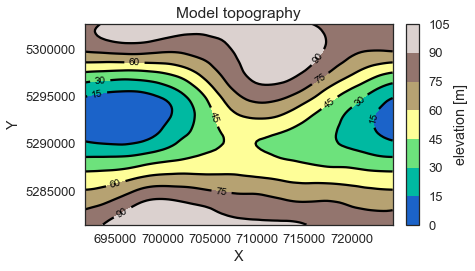

In [31]:
geo_model.set_topography(d_z=np.array([0,100]), fd=0.9, plot_object= vtkp)